# What makes Happiness?

For a long time, people have been interested in what makes us happy and how we can improve well-being in society. One big question is whether having more money or wealth actually makes people happier, or if there are other things that matter more. We often hear the saying “money can’t buy happiness,” but the real answer is a bit more complicated than that.

In this data story, we will explore how happiness relates to different economic and social factors using information from the World Happiness Report 2019 and World Development Indicators. This report looks at how happy people are in different countries and compares that with demographic variables like GDP per capita, Gross National Income (GNI), the gini index, unemployment rates, education levels, and life expectancy.

We want to find out if richer countries really have happier people, and if so, how strong this connection is. But we will also look beyond money to see how things like having a job, going to school, and living a long, healthy life affect happiness. For example, being unemployed might make people less happy even if their country is wealthy, and having a good education could improve well-being in ways that money alone can’t.

First, we will compare happiness scores with income indicators like GDP per capita and GNI. Then, we will analyze how unemployment rates relate to happiness. After that, we will look at the gini index, education and life expectancy to see how these factors could affect happiness scores across countries.

By comparing these different aspects, we hope to better understand what really contributes to happiness around the world. This will help us see whether the saying “money buys happiness” really holds. And if it doesn’t hold, we could find out what does make happiness.Hallo

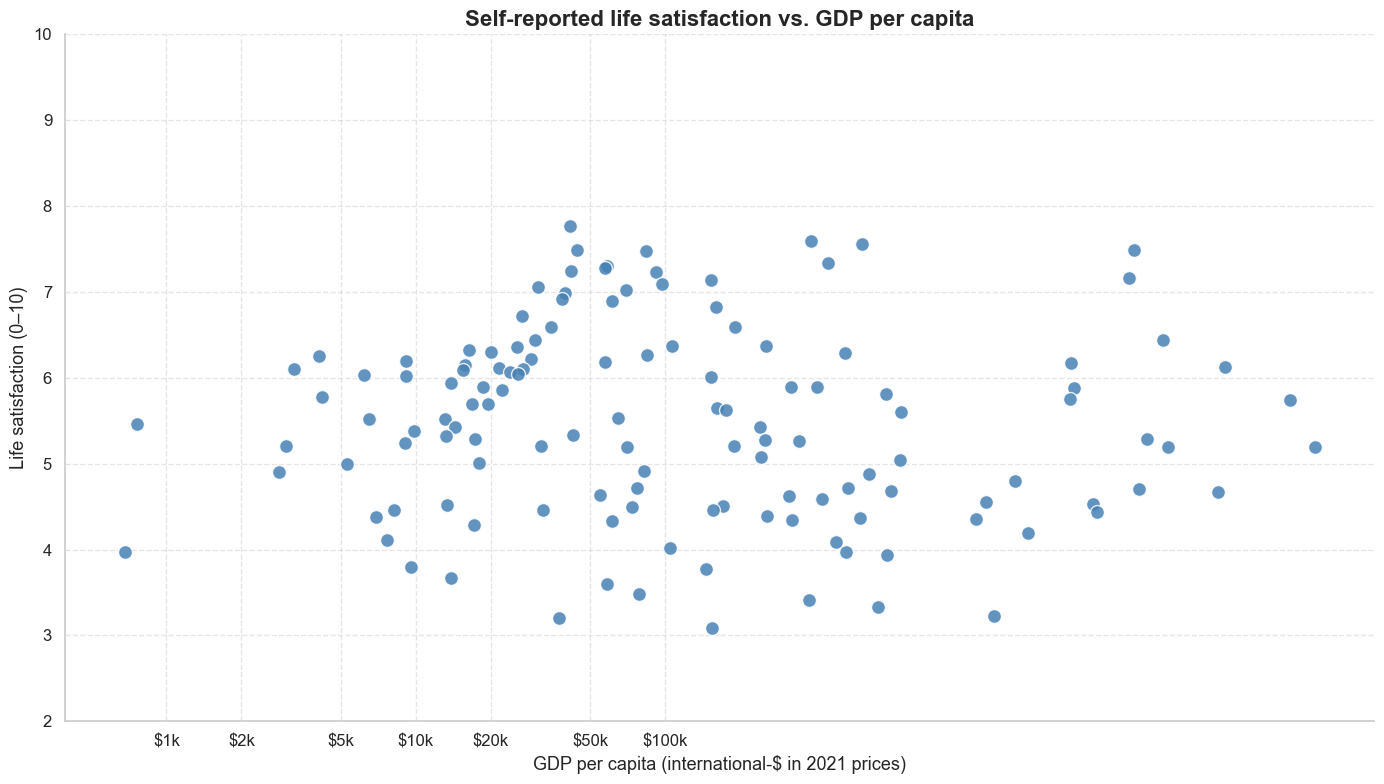

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


happiness_df = pd.read_csv("2019happy.csv")
gdp_df = pd.read_csv("WDI_new.csv")


happiness_df = happiness_df[['Country or region', 'Score']]
happiness_df.rename(columns={'Country or region': 'Country', 'Score': 'Happiness Score'}, inplace=True)


gdp_df = gdp_df[gdp_df['Series Name'] == 'GDP per capita (constant LCU)']
gdp_df = gdp_df[['Country Name', '2019 [YR2019]']]
gdp_df.rename(columns={'Country Name': 'Country', '2019 [YR2019]': 'GDP per capita'}, inplace=True)
gdp_df['GDP per capita'] = pd.to_numeric(gdp_df['GDP per capita'], errors='coerce')


merged_df = pd.merge(happiness_df, gdp_df, on='Country')
merged_df.dropna(inplace=True)


plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

plt.scatter(
    merged_df['GDP per capita'],
    merged_df['Happiness Score'],
    color='steelblue',
    edgecolor='white',
    s=100,
    alpha=0.85
)

plt.xscale('log')


xticks = [1000, 2000, 5000, 10000, 20000, 50000, 100000]
plt.xticks(xticks, [f"${int(x/1000)}k" for x in xticks], fontsize=12)

plt.yticks(range(2, 11), fontsize=12)
plt.ylim(2, 10)


plt.xlabel('GDP per capita (international-$ in 2021 prices)', fontsize=13)
plt.ylabel('Life satisfaction (0–10)', fontsize=13)
plt.title('Self-reported life satisfaction vs. GDP per capita', fontsize=16, weight='bold')

plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

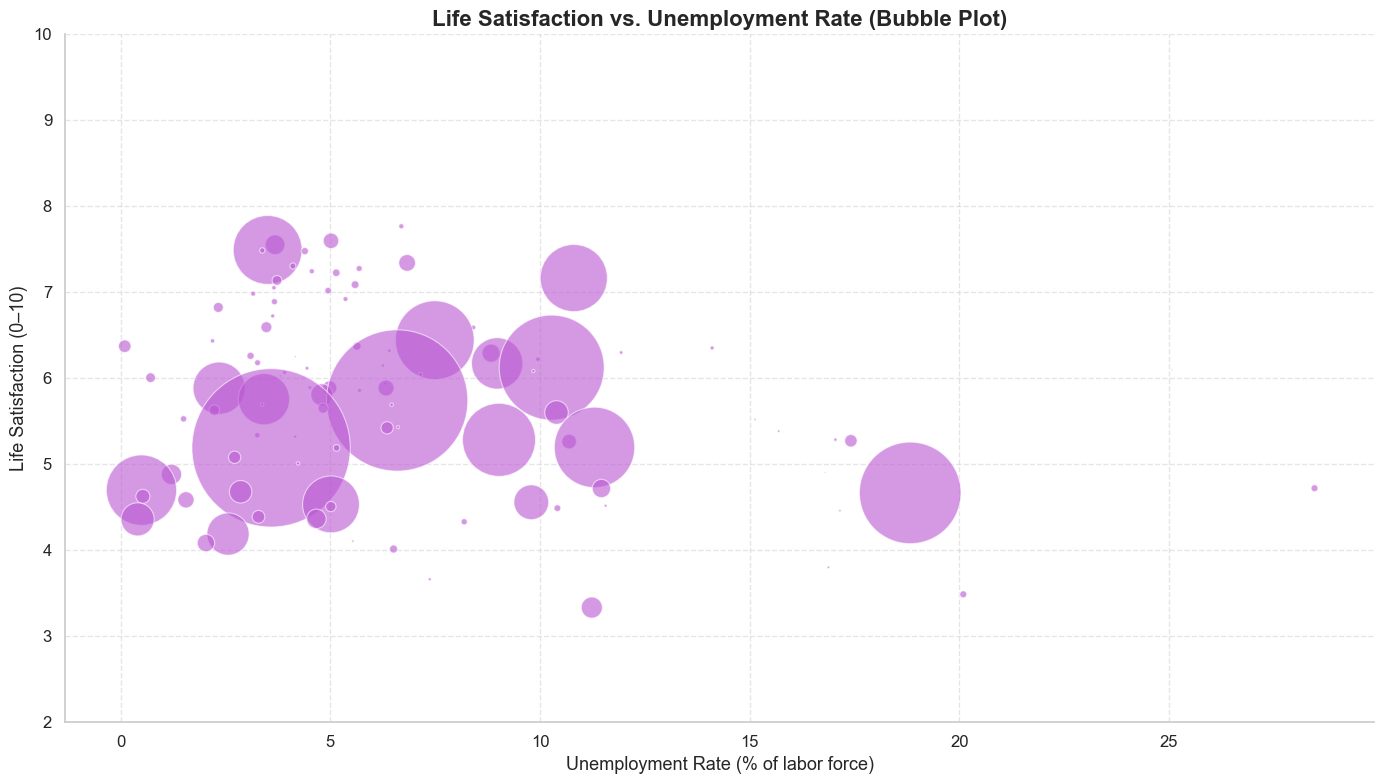

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

happiness_df = pd.read_csv("2019happy.csv")
wdi_df = pd.read_csv("WDI_new.csv")

happiness_df = happiness_df[['Country or region', 'Score']]
happiness_df.rename(columns={'Country or region': 'Country', 'Score': 'Happiness Score'}, inplace=True)

unemp_df = wdi_df[wdi_df['Series Name'] == 'Unemployment, total (% of total labor force) (national estimate)']
unemp_df = unemp_df[['Country Name', '2019 [YR2019]']]
unemp_df.rename(columns={'Country Name': 'Country', '2019 [YR2019]': 'Unemployment Rate'}, inplace=True)
unemp_df['Unemployment Rate'] = pd.to_numeric(unemp_df['Unemployment Rate'], errors='coerce')

gdp_df = wdi_df[wdi_df['Series Name'] == 'GDP per capita (constant LCU)']
gdp_df = gdp_df[['Country Name', '2019 [YR2019]']]
gdp_df.rename(columns={'Country Name': 'Country', '2019 [YR2019]': 'GDP per capita'}, inplace=True)
gdp_df['GDP per capita'] = pd.to_numeric(gdp_df['GDP per capita'], errors='coerce')

merged_df = pd.merge(happiness_df, unemp_df, on='Country')
merged_df = pd.merge(merged_df, gdp_df, on='Country', how='left')
merged_df.dropna(subset=['Happiness Score', 'Unemployment Rate'], inplace=True)

if 'GDP per capita' in merged_df.columns:
    merged_df['Bubble Size'] = merged_df['GDP per capita'] / merged_df['GDP per capita'].max() * 13000
else:
    merged_df['Bubble Size'] = 500

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

plt.scatter(
    merged_df['Unemployment Rate'],
    merged_df['Happiness Score'],
    s=merged_df['Bubble Size'],
    alpha=0.6,
    color='mediumorchid',
    edgecolor='white',
    linewidth=0.8
)

plt.xlabel('Unemployment Rate (% of labor force)', fontsize=13)
plt.ylabel('Life Satisfaction (0–10)', fontsize=13)
plt.title('Life Satisfaction vs. Unemployment Rate (Bubble Plot)', fontsize=16, weight='bold')

plt.xticks(fontsize=12)
plt.yticks(range(2, 11), fontsize=12)
plt.ylim(2, 10)
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()


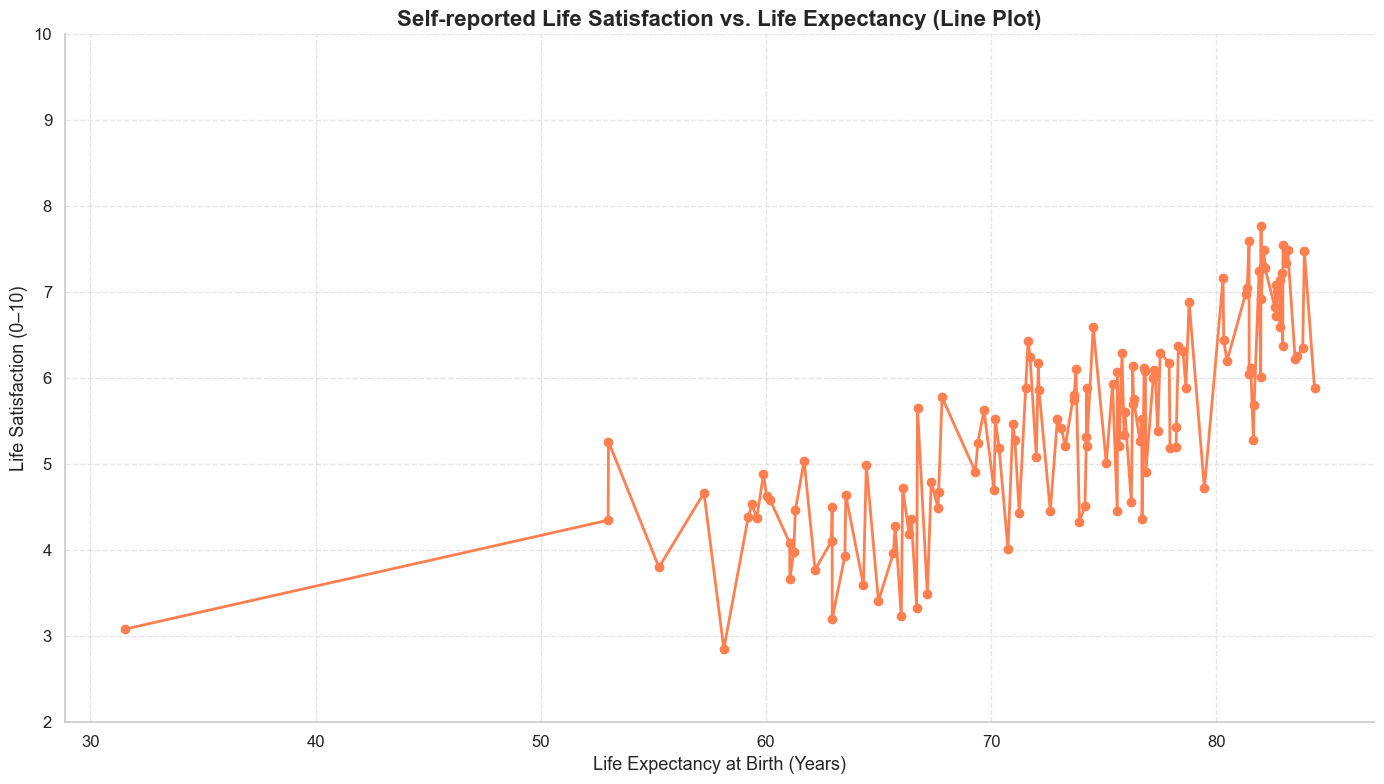

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


happiness_df = pd.read_csv("2019happy.csv")
gdp_df = pd.read_csv("WDI_new.csv")


happiness_df = happiness_df[['Country or region', 'Score']]
happiness_df.rename(columns={'Country or region': 'Country', 'Score': 'Happiness Score'}, inplace=True)


life_exp_df = gdp_df[gdp_df['Series Name'] == 'Life expectancy at birth, total (years)']
life_exp_df = life_exp_df[['Country Name', '2019 [YR2019]']]
life_exp_df.rename(columns={'Country Name': 'Country', '2019 [YR2019]': 'Life Expectancy'}, inplace=True)
life_exp_df['Life Expectancy'] = pd.to_numeric(life_exp_df['Life Expectancy'], errors='coerce')


merged_df = pd.merge(happiness_df, life_exp_df, on='Country')
merged_df.dropna(inplace=True)


merged_df = merged_df.sort_values('Life Expectancy')


plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

plt.plot(
    merged_df['Life Expectancy'],
    merged_df['Happiness Score'],
    marker='o',
    color='coral',
    linewidth=2,
    markersize=6
)

plt.xticks(fontsize=12)
plt.yticks(range(2, 11), fontsize=12)
plt.ylim(2, 10)

plt.xlabel('Life Expectancy at Birth (Years)', fontsize=13)
plt.ylabel('Life Satisfaction (0–10)', fontsize=13)
plt.title('Self-reported Life Satisfaction vs. Life Expectancy (Line Plot)', fontsize=16, weight='bold')

plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()


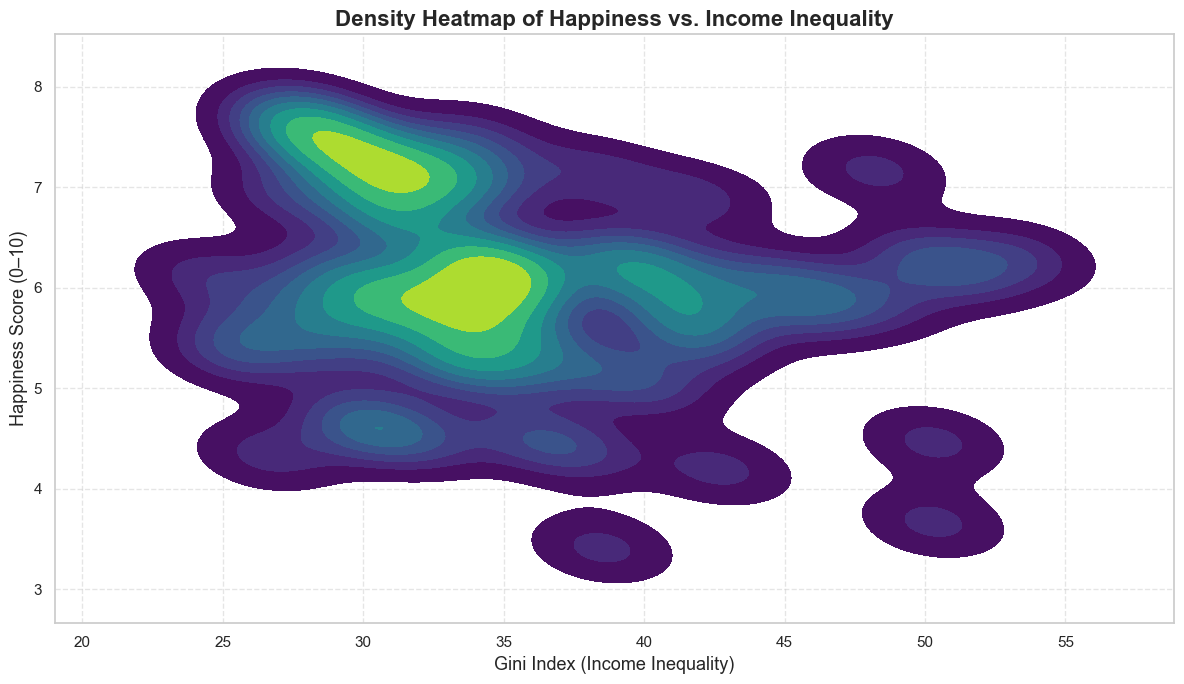

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

happiness_df = pd.read_csv("2019happy.csv")
wdi_df = pd.read_csv("WDI_new.csv")

happiness_df = happiness_df[['Country or region', 'Score']]
happiness_df.rename(columns={'Country or region': 'Country', 'Score': 'Happiness Score'}, inplace=True)

gini_df = wdi_df[wdi_df['Series Name'] == 'Gini index']
gini_df = gini_df[['Country Name', '2019 [YR2019]']]
gini_df.rename(columns={'Country Name': 'Country', '2019 [YR2019]': 'Gini Index'}, inplace=True)
gini_df['Gini Index'] = pd.to_numeric(gini_df['Gini Index'], errors='coerce')

merged_df = pd.merge(happiness_df, gini_df, on='Country')
merged_df.dropna(inplace=True)

plt.figure(figsize=(12, 7))
sns.kdeplot(
    x=merged_df['Gini Index'],
    y=merged_df['Happiness Score'],
    cmap="viridis",
    fill=True,
    bw_adjust=0.5,
    thresh=0.05
)

plt.xlabel('Gini Index (Income Inequality)', fontsize=13)
plt.ylabel('Happiness Score (0–10)', fontsize=13)
plt.title('Density Heatmap of Happiness vs. Income Inequality', fontsize=16, weight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


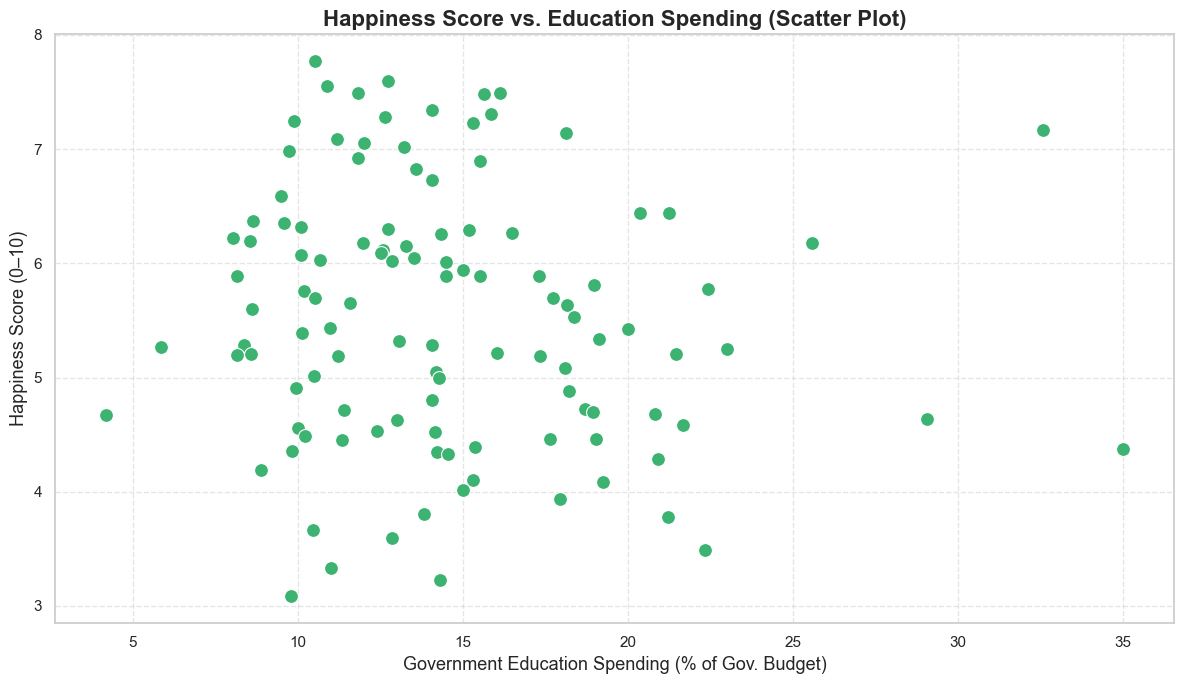

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

happiness_df = pd.read_csv("2019happy.csv")
wdi_df = pd.read_csv("WDI_new.csv")

happiness_df = happiness_df[['Country or region', 'Score']]
happiness_df.rename(columns={'Country or region': 'Country', 'Score': 'Happiness Score'}, inplace=True)

edu_df = wdi_df[wdi_df['Series Name'] == 'Government expenditure on education, total (% of government expenditure)']
edu_df = edu_df[['Country Name', '2019 [YR2019]']]
edu_df.rename(columns={'Country Name': 'Country', '2019 [YR2019]': 'Education Spending (%)'}, inplace=True)
edu_df['Education Spending (%)'] = pd.to_numeric(edu_df['Education Spending (%)'], errors='coerce')

merged_df = pd.merge(happiness_df, edu_df, on='Country')
merged_df.dropna(inplace=True)

plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")

sns.scatterplot(
    data=merged_df,
    x='Education Spending (%)',
    y='Happiness Score',
    color='mediumseagreen',
    s=100,
    edgecolor='white'
)

plt.xlabel('Government Education Spending (% of Gov. Budget)', fontsize=13)
plt.ylabel('Happiness Score (0–10)', fontsize=13)
plt.title('Happiness Score vs. Education Spending (Scatter Plot)', fontsize=16, weight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
